In [ ]:
# Возьмите датасет Mortality and Water Hardness**
# https://www.kaggle.com/ukveteran/mortality-and-water-hardness

# В этом датасете содержатся данные по средней годовой смертности на
# 100000 населения и концентрации кальция в питьевой воде для 61
# большого города в Англии и Уэльсе. Города дополнительно поделены на
# северные и южные.

# Задание 1.
# `Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
# `Построить точечный график
# `Рассчитать коэффициенты корреляции Пирсона и Спирмена
# `Построить модель линейной регрессии
# `Рассчитать коэффициент детерминации
# `Вывести график остатков
# Задание 2.
# `Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
# `Разделить данные на 2 группы
# `Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Настройка графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

In [7]:
df = pd.read_csv('D:\\Work\\2023_Diplama\\Netology\\STPY-41\\datas\\water.csv')[['location', 'hardness', 'mortality']]
print(df)

   location  hardness  mortality
0     South       105       1247
1     North        17       1668
2     South         5       1466
3     North        14       1800
4     North        18       1609
..      ...       ...        ...
56    South        60       1527
57    South        53       1627
58    South       122       1486
59    South        81       1485
60    North        71       1378

[61 rows x 3 columns]


<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды'}, xlabel='hardness', ylabel='mortality'>

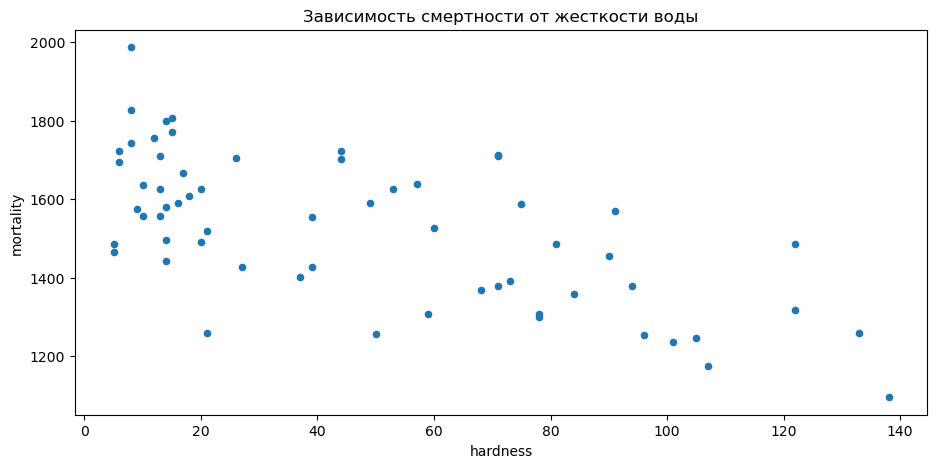

In [8]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жёсткости воды')

In [ ]:
# На графике обратная линейная зависимость смертности Южных и Северных территорий от степени жёсткости воды. 
# Чем меньше жёсткость воды тем больше смертность.

In [10]:
print('Коэффициенты корреляции Пирсона')
print(df[['hardness', 'mortality']].corr())
print('Коэффициенты корреляции Спирмена')
print(df[['hardness', 'mortality']].corr(method='spearman'))

Коэффициенты корреляции Пирсона
           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
Коэффициенты корреляции Спирмена
           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


In [24]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)  # обучается на данных и подбирает оптимальные коэффициенты
print(f'Коэффициент b0 = {model.coef_}')
print(f'Коэффициент b1 = {model.intercept_}')
y_pred = model.predict(X_test)
print(f'Предугадываем У-ки = {y_pred}')
print('Сравнение предугадываний с фактами')
df_sravn = X_test.copy()
df_sravn['y_pred'] = y_pred
df_sravn['y_test'] = y_test
print(df_sravn)


Коэффициент b0 = [-3.13606489]
Коэффициент b1 = 1667.3814435059633
Предугадываем У-ки = [1338.09462969 1636.02079457 1623.476535   1529.39458819 1422.76838181
 1604.66014564 1250.28481267 1432.17657649 1601.52408074 1648.56505414
 1482.35361479 1413.36018713 1545.07491266 1623.476535   1444.72083607
 1545.07491266 1636.02079457 1620.3404701  1350.63888926 1610.93227542
 1513.71426372]
Сравнение предугадываний с фактами
    hardness       y_pred  y_test
0        105  1338.094630    1247
5         10  1636.020795    1558
46        14  1623.476535    1495
31        44  1529.394588    1702
13        78  1422.768382    1307
55        20  1604.660146    1625
34       133  1250.284813    1259
49        75  1432.176576    1587
12        21  1601.524081    1519
40         6  1648.565054    1696
33        59  1482.353615    1309
59        81  1413.360187    1485
16        39  1545.074913    1555
3         14  1623.476535    1800
53        71  1444.720836    1709
17        39  1545.074913    1428

In [25]:
# значение коэффициента детерминации
# убеждаемся в удовлетворительности результатов
model.score(X_test, y_test) 

0.5024327259599013

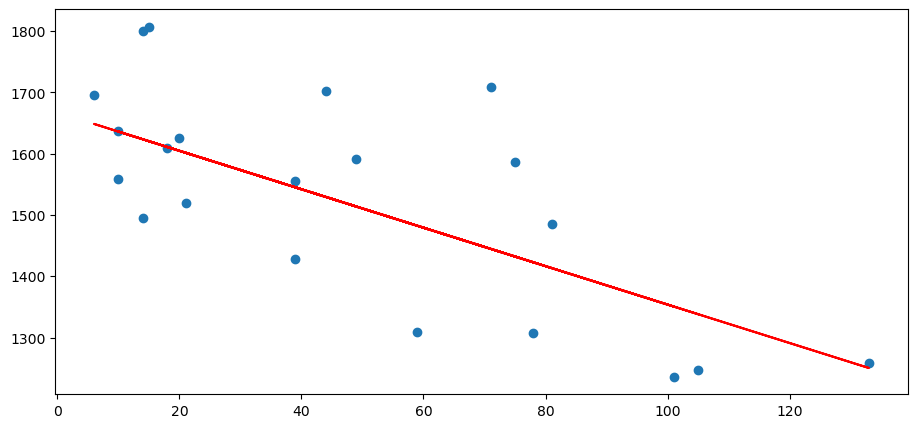

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# зависимость смертности от жесткости воды наблюдается

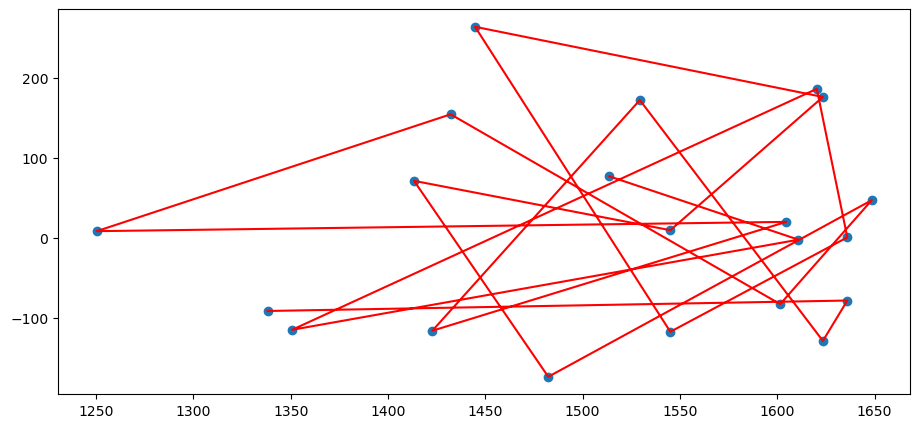

In [18]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

In [ ]:
# какой-то хаотичный график. Что это значит ?)

In [ ]:
# Задание 2
# Южные = South

In [41]:
df_selec_loc = df[df['location'] == 'South']

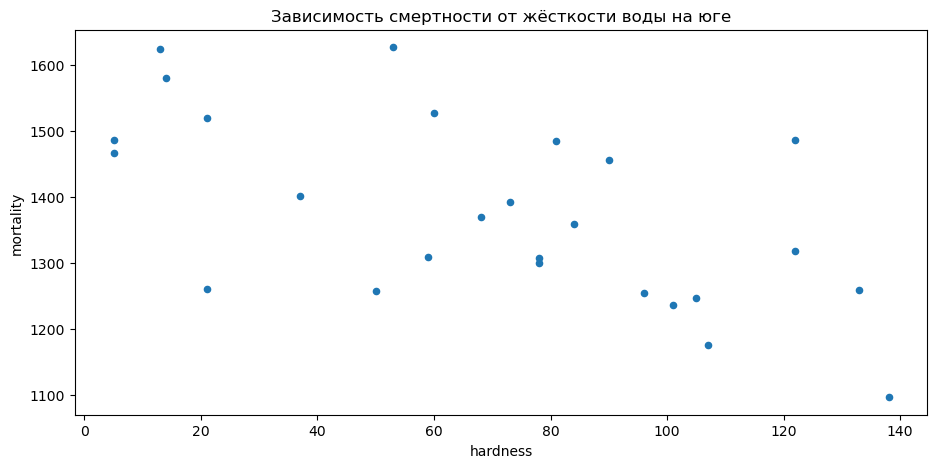

Коэффициенты корреляции Пирсона
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
Коэффициенты корреляции Спирмена
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000
Коэффициент b0 = [-3.32921527]
Коэффициент b1 = 1616.1200950622008
Предугадываем У-ки = [1209.95583268 1599.47401874 1266.55249219 1209.95583268 1492.93913024
 1546.20657449 1419.6963944  1599.47401874 1439.671686  ]
Сравнение предугадываний с фактами
    hardness       y_pred  y_test
18       122  1209.955833    1318
38         5  1599.474019    1486
0        105  1266.552492    1247
58       122  1209.955833    1486
27        37  1492.939130    1402
19        21  1546.206574    1260
33        59  1419.696394    1309
2          5  1599.474019    1466
57        53  1439.671686    1627
убеждаемся в удовлетворительности результатов
детерминация = -0.9929121569920714


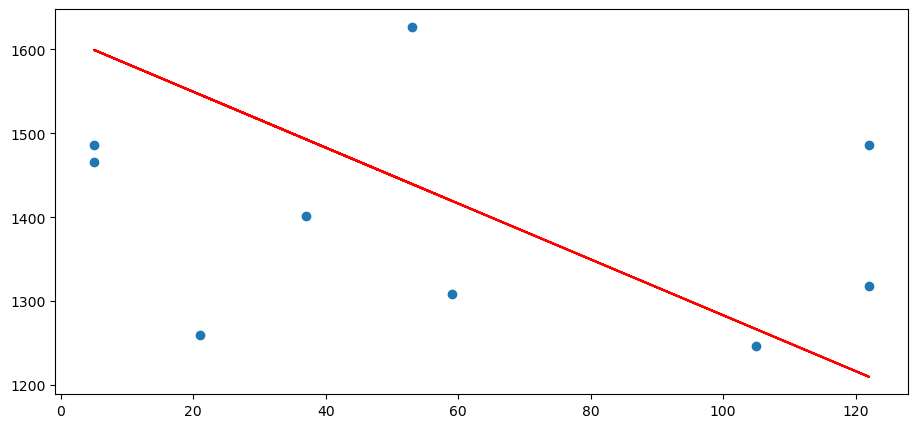

график остатков


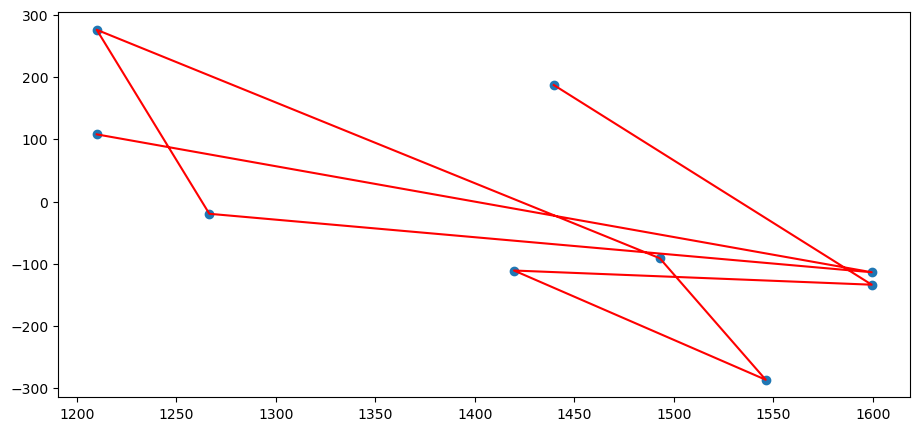

In [42]:
df_selec_loc.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жёсткости воды на юге')
plt.show()
print('Коэффициенты корреляции Пирсона')
print(df_selec_loc[['hardness', 'mortality']].corr())
print('Коэффициенты корреляции Спирмена')
print(df_selec_loc[['hardness', 'mortality']].corr(method='spearman'))
# Модель линейной регрессии
X = df_selec_loc[['hardness']]
y = df_selec_loc['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)  # обучается на данных и подбирает оптимальные коэффициенты
print(f'Коэффициент b0 = {model.coef_}')
print(f'Коэффициент b1 = {model.intercept_}')
# Предсказание
y_pred = model.predict(X_test)
print(f'Предугадываем У-ки = {y_pred}')
print('Сравнение предугадываний с фактами')
df_sravn = X_test.copy()
df_sravn['y_pred'] = y_pred
df_sravn['y_test'] = y_test
print(df_sravn)
# значение коэффициента детерминации
# убеждаемся в удовлетворительности результатов
print('убеждаемся в удовлетворительности результатов')
print(f'детерминация = {model.score(X_test, y_test)}')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.show()
# график остатков
print('график остатков')
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')
plt.show()

In [43]:
# Чекаем Север

In [44]:
df_selec_loc = df[df['location'] == 'North']

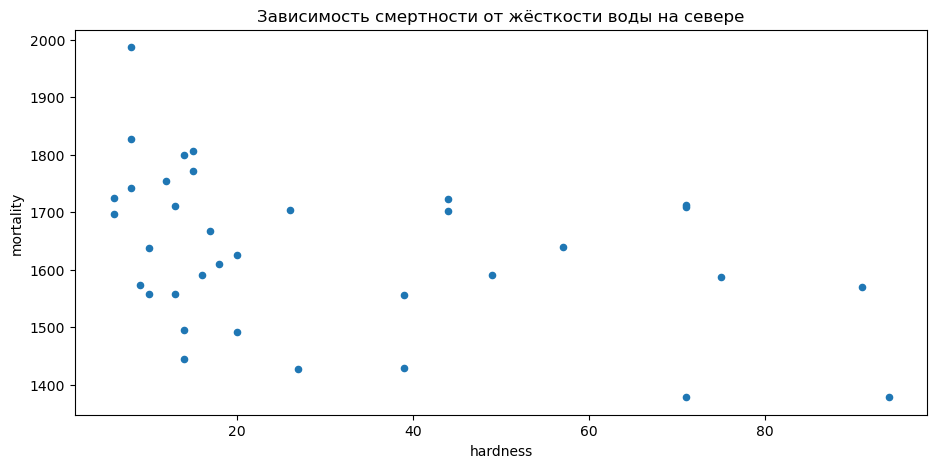

Коэффициенты корреляции Пирсона
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
Коэффициенты корреляции Спирмена
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000
Коэффициент b0 = [-1.9947167]
Коэффициент b1 = 1689.7784976331984
Предугадываем У-ки = [1673.820764   1671.8260473  1661.85246378 1677.81019741 1657.86303037
 1548.15361165 1602.01096266 1673.820764   1611.98454618 1659.85774707
 1611.98454618 1649.88416355]
Сравнение предугадываний с фактами
    hardness       y_pred  y_test
45         8  1673.820764    1987
23         9  1671.826047    1574
43        14  1661.852464    1444
36         6  1677.810197    1724
26        16  1657.863030    1591
50        71  1548.153612    1713
31        44  1602.010963    1702
22         8  1673.820764    1742
16        39  1611.984546    1555
28        15  1659.857747    1772
17        39  1611.984546    1428
55        20  1649.884164    1625
убеждаемся в 

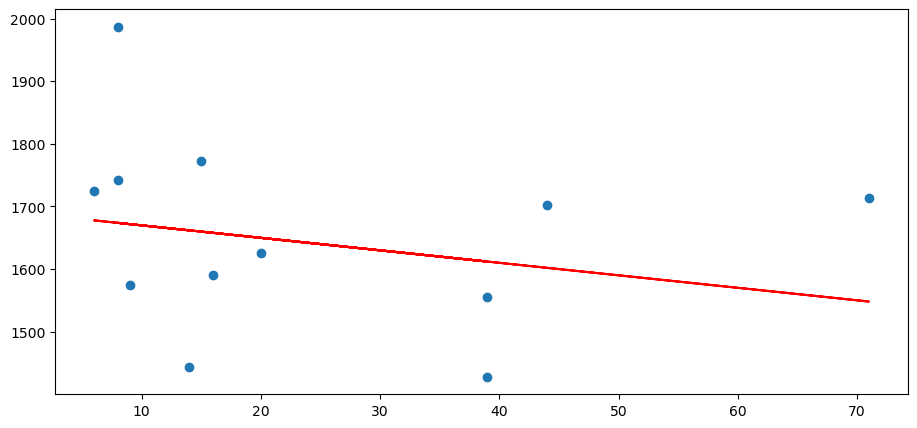

график остатков


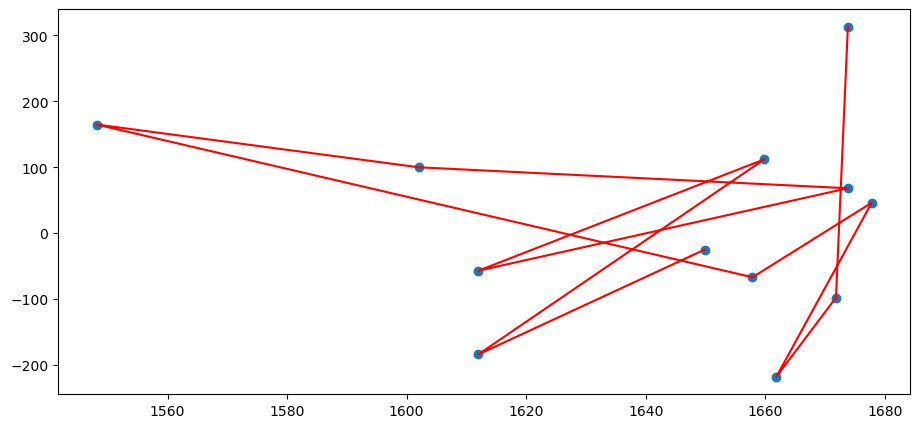

In [45]:
df_selec_loc.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жёсткости воды на севере')
plt.show()
print('Коэффициенты корреляции Пирсона')
print(df_selec_loc[['hardness', 'mortality']].corr())
print('Коэффициенты корреляции Спирмена')
print(df_selec_loc[['hardness', 'mortality']].corr(method='spearman'))
# Модель линейной регрессии
X = df_selec_loc[['hardness']]
y = df_selec_loc['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)  # обучается на данных и подбирает оптимальные коэффициенты
print(f'Коэффициент b0 = {model.coef_}')
print(f'Коэффициент b1 = {model.intercept_}')
# Предсказание
y_pred = model.predict(X_test)
print(f'Предугадываем У-ки = {y_pred}')
print('Сравнение предугадываний с фактами')
df_sravn = X_test.copy()
df_sravn['y_pred'] = y_pred
df_sravn['y_test'] = y_test
print(df_sravn)
# значение коэффициента детерминации
# убеждаемся в удовлетворительности результатов
print('убеждаемся в удовлетворительности результатов')
print(f'детерминация = {model.score(X_test, y_test)}')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.show()
# график остатков
print('график остатков')
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')
plt.show()

In [ ]:
# После разделения данных (юг и север) - уменьшение плотности распределения, корреляции, а детерминация отрицательная и близкая к нулю 
# => качество модели значительно ухудшилось. Лучше сравнивать на полном датасете.  

In [ ]:
# Анализирую юг и серер, можно сказать: 
# 1. Юг - распределение равномерно, а север - плотнее с малой степенью жесткости воды и большей смертности
# 2. На севере больше мест воды с малой степенью жесткости воды => больше смертность.
#
#